In [52]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score


iris = datasets.load_iris()
x, y = iris.data, iris.target
n_class = len(set(iris.target))
y_one_hot = label_binarize(y, np.arange(n_class))

# alpha = np.logspace(-2, 2, 20)  #设置超参数范围
# model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
model = LogisticRegression()
model.fit(x, y)
y_score = model.predict(x)
y_score_pro = model.predict_proba(x) #返回的是
y_score_one_hot = label_binarize(y_score, np.arange(n_class))
print(y_score_pro,y)

[[  8.79681649e-01   1.20307538e-01   1.08131372e-05]
 [  7.99706325e-01   2.00263292e-01   3.03825365e-05]
 [  8.53796795e-01   1.46177302e-01   2.59031285e-05]
 [  8.25383127e-01   1.74558937e-01   5.79356669e-05]
 [  8.97323628e-01   1.02665167e-01   1.12050036e-05]
 [  9.26986574e-01   7.30004562e-02   1.29693872e-05]
 [  8.95064974e-01   1.04895775e-01   3.92506205e-05]
 [  8.61839691e-01   1.38141399e-01   1.89095833e-05]
 [  8.03156719e-01   1.96758495e-01   8.47861140e-05]
 [  7.95421554e-01   2.04552763e-01   2.56832240e-05]
 [  8.92083069e-01   1.07910759e-01   6.17176870e-06]
 [  8.63364991e-01   1.36600589e-01   3.44201798e-05]
 [  7.88177618e-01   2.11794929e-01   2.74526810e-05]
 [  8.35079702e-01   1.64888155e-01   3.21426418e-05]
 [  9.28349898e-01   7.16491356e-02   9.66254924e-07]
 [  9.64535656e-01   3.54620850e-02   2.25877936e-06]
 [  9.40906153e-01   5.90890027e-02   4.84421830e-06]
 [  8.91740161e-01   1.08245661e-01   1.41772124e-05]
 [  8.96525617e-01   1.03467

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

obj1 = confusion_matrix(y, y_score)
print('confusion_matrix\n', obj1)

confusion_matrix
 [[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


In [54]:
print(y)
print('accuracy:{}'.format(accuracy_score(y, y_score)))
print('precision:{}'.format(precision_score(y, y_score,average='micro')))
print('recall:{}'.format(recall_score(y, y_score,average='micro')))
print('f1-score:{}'.format(f1_score(y, y_score,average='micro')))
print('AUC:{}\n'.format(roc_auc_score(y_one_hot, y_score_one_hot,average='micro')))
 #形式一：原始值（0或1或2）
     #形式二：各类概率值
         # 形式三：one-hot值

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy:0.96
precision:0.96
recall:0.96
f1-score:0.96
AUC:0.97



In [55]:
print('accuracy:{}\n'.format(accuracy_score(y_one_hot, y_score_one_hot)))
print('precision:{}\n'.format(precision_score(y_one_hot, y_score_one_hot,average='micro')))
print('recall:{}\n'.format(recall_score(y_one_hot, y_score_one_hot,average='micro')))
print('f1-score:{}\n'.format(f1_score(y_one_hot, y_score_one_hot,average='micro')))
print('AUC:{}\n'.format(roc_auc_score(y_one_hot, y_score_one_hot,average='micro')))

accuracy:0.96

precision:0.96

recall:0.96

f1-score:0.96

AUC:0.97



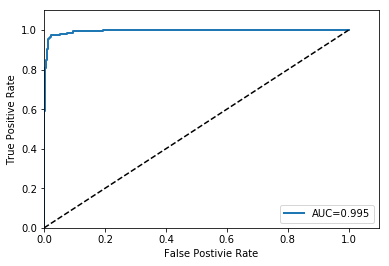

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline
auc = roc_auc_score(y_one_hot, y_score_pro,average='micro')
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())  # ravel()表示平铺开来
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
